
#Coding and Data Science for Finance           
######                                      Stocks Trading 
                                       
##  Use Machine Learning Techniques to trade stocks 

In this lab exercise, we work on the problem of predicting a buy or sell signal for a trading strategy in the classification framework. The predicted variable has a value of 1 for buy and 0 for sell. The buy or sell signal are decided on the basis on the comparison of short term vs. long term price.

The goal of this case study is tu use classification based models to predict whether the current signal is **buy or sell** depending on the short term vs long term price.


For this task, you need to pick a stock symbole in the market,accourding to your group number, and forecast to forecast stock price. 

#### Jose Miguel Ossa                ETU20220726


--------------------------------------                                     -------------------------
Rennes, November 14 2022                                                                      




#Summary
To create the trading signal of Dun & Bradstreet (DNB), we started by importing the libraries as well as the historical information of our stock. Null Values found in the stock historical prices were filled in with the last available values. We proceeded to label each movement of the short term price with a Short Simple Moving Average, 1 for up, 0 for down. 

Afterwards, the technical indicators exponencial moving average, rate of change, price momentum, relative strength index, stochastic oscillator, moving average, were calculated with the close price of DNB, obtaining 19 results. We dropped columns not need, maintaining only Close price, Signal and the te hno al indicators just obtained.

We plotted the dataset of indicators, close price and signal and checked their correlation through a heat map. 

Later on, we tested with Train Test Split in which the position cut keeps the first subset as training and the second one as testing. 

Finally, we created for prediction (using accuracy), got the confusion matrix for each of the following models and compared the models with important features to predict direction of return for teh following models: 
- Support Vector Machine Model 
- Confusion Matrix
- Decision Tree Model 
- Linear Regression 
- Random Forest Model  

We finally concluded that the SVM with the polynomial kernel was the best model for our dataset due to its accuracy and ability to identify signals that other models could not.

## Content

<a id='0'></a>
# 1. Problem Definition

The problem of predicting a buy or sell signal for a trading strategy is defined in the
classification framework, where the predicted variable has a value of 1 for buy and 0
for sell.

The buy or sell signal are decided on the basis on the comparison of short term vs. long
term price.



<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [101]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np 
import plotly.graph_objs as go
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor 
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM

<a id='1.2'></a>
## 2.2. Loading the Data

In [103]:
# Define MyTicker with the ticker of DNB 
MyTicker = yf.Ticker("DNB")

Dun & Bradstreet Holdings, Inc. (DNB) is a business analytics firm within the Financial Data & Stock Exchanges industry. It had it's Initial Public Offering on July 1st 2020. It announced the offering of 78.3 million shares of common stock at a price of 22.00 USD per share, raising around 1.7 USD billion. To this day, DNB's had its historic high on october 10th 2020 at a price of 28.16 USD and it's historic low (11.44 USD) almost exactly two years later (10/16/2022). 

On November the 10th the stock's current price was 13.08 USD with a dividend yield of 1.53%, with a 52 week high of 20.86 USD and low 11.23 USD.

References:
*   https://www.dnb.com/perspectives/newsroom/dun-bradstreet-announces-pricing-initial-public-offering.html
*   https://www.reuters.com/article/us-dun-bradstreet-ipo-idUSKBN2413PX

In [104]:
# get historical market data from yahoo finance
data_s = MyTicker.history(start="2020-01-01", end="2022-11-25")
data_s['Date'] = data_s.index

In [105]:
#Description of the data
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the described method
print(data_s.describe())
data_s.head(5)

             Open        High         Low       Close        Volume   Dividends  Stock Splits
count  606.000000  606.000000  606.000000  606.000000  6.060000e+02  606.000000         606.0
mean    19.973877   20.283135   19.656054   19.955693  1.876228e+06    0.000083           0.0
std      4.330875    4.417771    4.248978    4.323590  1.970240e+06    0.002031           0.0
min     11.338837   11.438039   11.140432   11.348757  1.935000e+05    0.000000           0.0
25%     16.551055   16.817969   16.366935   16.553527  1.003000e+06    0.000000           0.0
50%     19.652677   19.894878   19.094141   19.558765  1.465200e+06    0.000000           0.0
75%     24.046852   24.321178   23.545154   24.064151  2.155200e+06    0.000000           0.0
max     28.272967   29.210126   27.580972   27.837999  3.714840e+07    0.050000           0.0


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-07-01 00:00:00-04:00,24.714135,25.574187,23.972711,25.060133,37148400,0.0,0.0,2020-07-01 00:00:00-04:00
2020-07-02 00:00:00-04:00,25.010702,27.284404,24.714133,26.790121,6754500,0.0,0.0,2020-07-02 00:00:00-04:00
2020-07-06 00:00:00-04:00,27.432687,27.877542,26.009153,27.076803,6394100,0.0,0.0,2020-07-06 00:00:00-04:00
2020-07-07 00:00:00-04:00,25.959727,27.086691,25.762013,26.295839,2995200,0.0,0.0,2020-07-07 00:00:00-04:00
2020-07-08 00:00:00-04:00,26.582521,26.671492,25.257844,26.187096,8779900,0.0,0.0,2020-07-08 00:00:00-04:00


<a id='2'></a>
# 3. Exploratory Data Analysis

In [106]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

# Using Plotly we will see how the stock looks like.
# Plot time series the close price and volume of stock price
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing stock's price of Dun & Bradstreet 2020-2022",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume of Dun & Bradstreet",xaxis_title="Date", yaxis_title="Volume")
fig.show()


As for the volume of stocks traded, the only outstanding event is the peak in june 2020, which is explained by Dun & Bradstreet's initial public offering (IPO), so it's natural that a high volume of their shares were traded during this period.

Regarding the overall drop in the price of their stock, an overpricing of the shares during the IPO points to the beggining of the decrease. Moreover, the bear market in 2022 caused by the post-covid market correction, Russian invasion of Ukraine and high inflation due to covid stimulus, hasn't been the optimal scenario for a price bounce back.

Company wise, insiders selling part of their stock over the last year, doesn't send a good message to investors. Besides, Dun & Bradstreet is still producing losses, and although this isn't a major concern for investors, the gross revenue increase of 14% doesn't seem to be attracting enough for potential stockholders.

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [107]:
# A look of the data
set_option('display.width', 100)
data.tail(5)

,Date,Close,Open,High,Low,Volume
Date,,,,,,
2022-11-17 00:00:00-05:00,2022-11-17 00:00:00-05:00,13.947862,14.007383,14.076824,13.605613,2184800
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,12.926076,13.352647,13.362567,12.648309,4192900
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,13.035199,12.896315,13.055039,12.717751,2946300
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,13.055039,13.074880,13.129441,12.856635,1522300
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,13.263364,13.025278,13.303045,12.901275,2007500


In [108]:
# Description of the data
data.describe()


,Close,Open,High,Low,Volume
count,606.000000,606.000000,606.000000,606.000000,6.060000e+02
mean,19.955693,19.973877,20.283135,19.656054,1.876228e+06
std,4.323590,4.330875,4.417771,4.248978,1.970240e+06
min,11.348757,11.338837,11.438039,11.140432,1.935000e+05
25%,16.553527,16.551055,16.817969,16.366935,1.003000e+06
50%,19.558765,19.652677,19.894878,19.094141,1.465200e+06
75%,24.064151,24.046852,24.321178,23.545154,2.155200e+06
max,27.837999,28.272967,29.210126,27.580972,3.714840e+07


The data sampled are the share close prices from Dun & Bradstreet from june 2020 (IPO) to november 2022. With the close price mean being so close to the 50th percentile, we can assume that there is no big risk of having particularly high or low close prices. 

However, by having a mean higher than the median, a positive skewness of the data is implied, and therefore higher prices tend to be outliers. This turns out to be a problem, given that these high prices appeared only in the early months of the firm's public history, and there have been no signs of the price coming back to this level or displaying any increase whatsoever. 

<a id='3'></a>
# 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning

In [109]:
#Checking for any null values and removing the null values
print('Null Values =',data.isnull().values.any())

Null Values = False


Given that there are not null values, we do not need to clean the data by filling the *NaNs* with the last available values. 

In [110]:
#dataset[dataset.columns.values] = dataset[dataset.columns.values].ffill()
#dataset=dataset.drop(columns=['Timestamp'])

<a id='3.2'></a>
## 4.2. Preparing the data for classification

We attach a label to each movement: 
* **1** if the signal is that short term price will go up as compared to the long term. 
* **0** if the signal is that short term price will go down as compared to the long term.

In [111]:
# Initialize the `signals` DataFrame with the `signal` column
# Create short simple moving average over the short window
data['short_mavg'] = data['Close'].rolling(window=10, min_periods=1, center=False).mean()
# Create long simple moving average over the long window
data['long_mavg'] = data['Close'].rolling(window=100, min_periods=1, center=False).mean()


In [112]:
fig=go.Figure(data=[go.Scatter(name = 'short_mavg',x= data['Date'],y= data['short_mavg'])])
fig.add_scatter(name = 'long_mavg',x=data['Date'], y=data['long_mavg'], mode='lines')
fig.update_layout(title="long_mavg and short_mavg",xaxis_title="Date", yaxis_title="mavg")
fig.show()

Here they are the long and short moving averages. According to the theory, we should buy when the short is greater than the long MAVG. The graphs show that as the prices are mainly going down, they are not a lot of days when the short moving average is h

https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp

In [113]:
# Create signals

data['signal'] = np.where(data['short_mavg'] > data['long_mavg'], 1.0, 0.0)

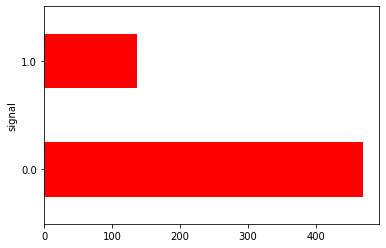

In [114]:
fig = plt.figure()
plot = data.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

We can see that the amount of sell signals is a lot greater than the buy ones, that could lead to problems of overfitting as the data is highly skewed

In [115]:
data['signal'].mean()

0.22607260726072606

In [116]:
data.tail()

,Date,Close,Open,High,Low,Volume,short_mavg,long_mavg,signal
Date,,,,,,,,,
2022-11-17 00:00:00-05:00,2022-11-17 00:00:00-05:00,13.947862,14.007383,14.076824,13.605613,2184800,13.688943,13.973631,0.0
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,12.926076,13.352647,13.362567,12.648309,4192900,13.697871,13.954310,0.0
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,13.035199,12.896315,13.055039,12.717751,2946300,13.670095,13.936081,0.0
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,13.055039,13.074880,13.129441,12.856635,1522300,13.665134,13.917358,0.0
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,13.263364,13.025278,13.303045,12.901275,2007500,13.693903,13.908330,0.0


<a id='3.3'></a>
## 4.3. Feature Engineering

We begin by the constructing a dataset that contains the predictors which will be used to make the predictions, and the output variable.

The current Data of the stock consists of date, open, high, low, close and Volume. Using this data we calculate the following  technical indicators:
* **Moving Average** : A moving average provides an indication of the trend of the price movement by cut down the amount of "noise" on a price chart. 
* **Stochastic Oscillator %K and %D** : A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** :It is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 
* **Rate Of Change(ROC)**: It is a momentum oscillator, which measures the percentage change between the current price and the n period past price. 
* **Momentum (MOM)** : It is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing.

#### Detais of momentum indicators
Using this data, we calculate the following momentum indicators:

### Moving average
A moving average provides an indication of a price trend by cutting down the
amount of noise in the series.

### Stochastic oscillator %K
A stochastic oscillator is a momentum indicator that compares the closing price
of a security to a range of its previous prices over a certain period of time. %K and %D are slow and fast indicators. The fast indicator is more sensitive than the slow indicator to changes in the price of the underlying security and will likely result in many transaction signals.

###  Relative strength index (RSI)
This is a momentum indicator that measures the magnitude of recent price
changes to evaluate overbought or oversold conditions in the price of a stock or
other asset. The RSI ranges from 0 to 100. An asset is deemed to be overbought
once the RSI approaches 70, meaning that the asset may be getting overvalued
and is a good candidate for a pullback. Likewise, if the RSI approaches 30, it is an indication that the asset may be getting oversold and is therefore likely to become undervalued.

###  Rate of change (ROC)
This is a momentum oscillator that measures the percentage change between the
current price and the n period past prices. Assets with higher ROC values are
considered more likely to be overbought; those with lower ROC, more likely to
be oversold.

In [117]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC


#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)

#calculation of stochastic osillator.
def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

In [118]:
data['EMA10'] = EMA(data, 10)
data['EMA30'] = EMA(data, 30)
data['EMA200'] = EMA(data, 200)
data['ROC10'] = ROC(data['Close'], 10)
data['ROC30'] = ROC(data['Close'], 30)
data['MOM10'] = MOM(data['Close'], 10)
data['MOM30'] = MOM(data['Close'], 30)
data['RSI10'] = RSI(data['Close'], 10)
data['RSI30'] = RSI(data['Close'], 30)
data['RSI200'] = RSI(data['Close'], 200)
data['%K10'] = STOK(data['Close'], data['Low'], data['High'], 10)
data['%D10'] = STOD(data['Close'], data['Low'], data['High'], 10)
data['%K30'] = STOK(data['Close'], data['Low'], data['High'], 30)
data['%D30'] = STOD(data['Close'], data['Low'], data['High'], 30)
data['%K200'] = STOK(data['Close'], data['Low'], data['High'], 200)
data['%D200'] = STOD(data['Close'], data['Low'], data['High'], 200)
data['MA21'] = MA(data, 10)
data['MA63'] = MA(data, 30)
data['MA252'] = MA(data, 200)

In [119]:
data.tail(5)

,Date,Close,Open,High,Low,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-17 00:00:00-05:00,2022-11-17 00:00:00-05:00,13.947862,14.007383,14.076824,13.605613,2184800,13.688943,13.973631,0.0,13.700499,13.116425,15.139767,8.655345,13.846154,1.815405,1.368994,62.402091,54.055913,47.135367,70.040504,82.914746,79.271716,86.648006,30.899719,32.798234,13.688943,12.566633,15.294076
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,12.926076,13.352647,13.362567,12.648309,4192900,13.697871,13.954310,0.0,13.559694,13.104144,15.117687,-2.906117,6.715802,0.089283,0.674576,45.135338,47.747506,46.321108,13.658521,56.191864,50.420161,71.988805,20.594665,27.908183,13.697871,12.589119,15.261431
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,13.035199,12.896315,13.055039,12.717751,2946300,13.670095,13.936081,0.0,13.464332,13.099696,15.096917,-0.529902,10.606059,-0.277767,0.922583,46.879507,48.412626,46.420454,19.024401,34.241142,53.501408,61.064428,21.853234,24.449206,13.670095,12.619871,15.229678
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,13.055039,13.074880,13.129441,12.856635,1522300,13.665134,13.917358,0.0,13.389915,13.096815,15.076551,0.611621,9.849757,-0.049602,1.269791,47.218480,48.535838,46.438567,19.999999,17.560974,54.061625,52.661065,22.082061,21.509987,13.665134,12.662198,15.198519
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,13.263364,13.025278,13.303045,12.901275,2007500,13.693903,13.908330,0.0,13.366906,13.107560,15.058467,-3.812951,12.258600,0.287686,1.378914,50.875691,49.837224,46.628973,30.243867,23.089423,59.943958,55.835664,24.484764,22.806687,13.693903,12.708161,15.167215


In [120]:
#excluding columns that are not needed for our prediction.

dataset=data.drop(['High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

In [121]:
dataset = dataset.dropna(axis=0)

In [122]:
dataset.tail()

,Date,Close,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,,
2022-11-17 00:00:00-05:00,2022-11-17 00:00:00-05:00,13.947862,0.0,13.700499,13.116425,15.139767,8.655345,13.846154,1.815405,1.368994,62.402091,54.055913,47.135367,70.040504,82.914746,79.271716,86.648006,30.899719,32.798234,13.688943,12.566633,15.294076
2022-11-18 00:00:00-05:00,2022-11-18 00:00:00-05:00,12.926076,0.0,13.559694,13.104144,15.117687,-2.906117,6.715802,0.089283,0.674576,45.135338,47.747506,46.321108,13.658521,56.191864,50.420161,71.988805,20.594665,27.908183,13.697871,12.589119,15.261431
2022-11-21 00:00:00-05:00,2022-11-21 00:00:00-05:00,13.035199,0.0,13.464332,13.099696,15.096917,-0.529902,10.606059,-0.277767,0.922583,46.879507,48.412626,46.420454,19.024401,34.241142,53.501408,61.064428,21.853234,24.449206,13.670095,12.619871,15.229678
2022-11-22 00:00:00-05:00,2022-11-22 00:00:00-05:00,13.055039,0.0,13.389915,13.096815,15.076551,0.611621,9.849757,-0.049602,1.269791,47.218480,48.535838,46.438567,19.999999,17.560974,54.061625,52.661065,22.082061,21.509987,13.665134,12.662198,15.198519
2022-11-23 00:00:00-05:00,2022-11-23 00:00:00-05:00,13.263364,0.0,13.366906,13.107560,15.058467,-3.812951,12.258600,0.287686,1.378914,50.875691,49.837224,46.628973,30.243867,23.089423,59.943958,55.835664,24.484764,22.806687,13.693903,12.708161,15.167215


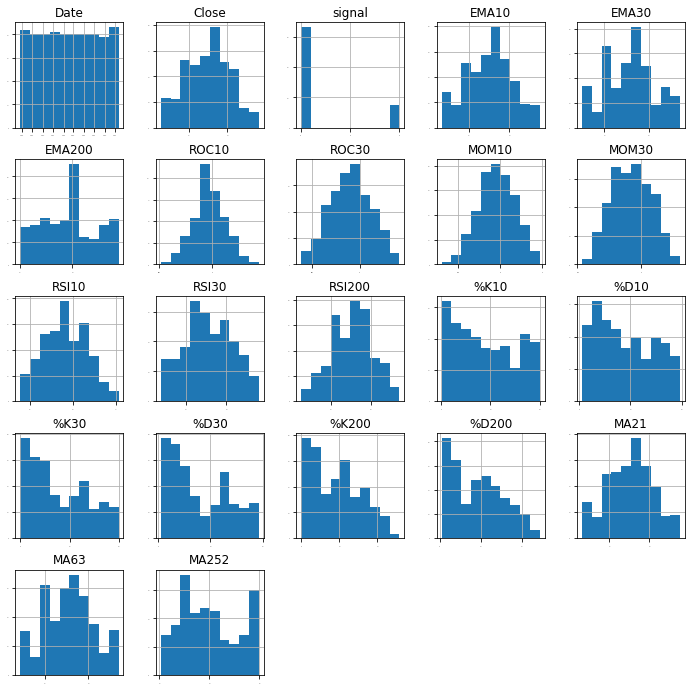

In [123]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

The predicted variable is upward 22.87% out of total data-size, meaning that number
of the buy signals were less than the number of sell signals. 

<AxesSubplot:title={'center':'Correlation Matrix'}>

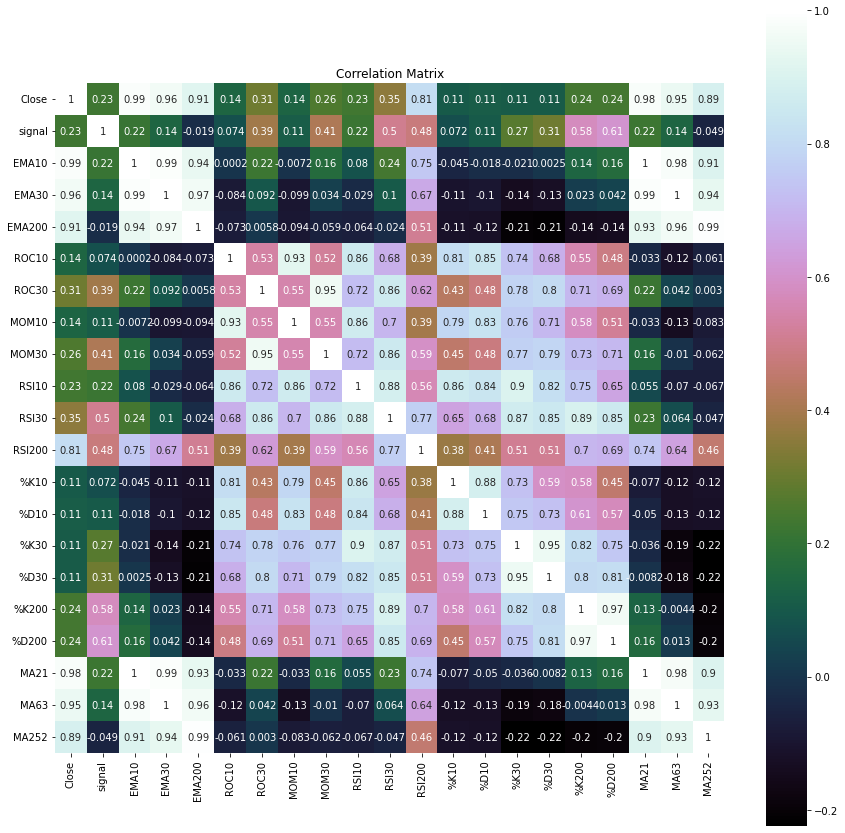

In [124]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

There are several strong correlations. However this is expected as the other variables are calculated with the close prices, so it is normal that would have some correlation between them.

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [125]:
# Function to split time series dataset. 

def Split_Train_Test(data, test_ratio):
    '''splits data into a training and testing set'''
    train_set_size = 1 - int(len(data) * test_ratio)
    train_set = data[:train_set_size]
    test_set = data[train_set_size:]
    return train_set, test_set

In [126]:
dataset_foranalysis=dataset.drop(['Date'], axis=1)
# Use of the function to split data to (30%-70%). 
train, test = Split_Train_Test(dataset_foranalysis, 0.3)

In [127]:
lags = range(1, 5)

train_XX=train.loc[:, train.columns != 'signal']
train_XXlag=train_XX.assign(**{
  f'{col} (t-{lag})': train_XX[col].shift(lag)
  for lag in lags
  for col in train_XX
  })
Y_train = train["signal"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows
train_XXlag.drop(train_XXlag.head(5).index,inplace=True) # drop last n rows


test_XX=test.loc[:, test.columns != 'signal']
test_XXlag=test_XX.assign(**{
  f'{col} (t-{lag})': test_XX[col].shift(lag)
  for lag in lags
  for col in test_XX
  })

Y_test = test["signal"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows
test_XXlag.drop(test_XXlag.head(5).index,inplace=True) # drop last n rows


This function ask for a test ratio, which is the proportion of the data that we want to keep for testing. Then it takes the lenght of the data and multiply it for (1- test_ratio) which is the proportion of training data. At the end it makes a cut on the position of this value, keeping the first subset as training data and the second one as testing. 

In this case, the data cannot be separated randomly because we are using a time series, were the order in the dates is a really important factor and splitting randomly will spoil that order and the indicators would not make any sense

In [128]:
#Now the train and test sets are created, using the lags of the same data
train_XX=train.loc[:, train.columns != 'signal']
X_train=pd.concat([train_XX.shift(1),train_XX.shift(2),train_XX.shift(3),train_XX.shift(4),train_XX.shift(5)], axis=1).dropna()

Y_train = train["signal"]
Y_train.drop(Y_train.head(5).index,inplace=True) # drop last n rows

####################
### test
test_XX=test.loc[:, test.columns != 'signal']

X_test=pd.concat([test_XX.shift(1),test_XX.shift(2),test_XX.shift(3),test_XX.shift(4),test_XX.shift(5)], axis=1).dropna()

Y_test = test["signal"]
Y_test.drop(Y_test.head(5).index,inplace=True) # drop last n rows

In [129]:
X_train

,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-27 00:00:00-04:00,23.992481,23.498174,23.341014,24.414310,6.167987,2.578194,1.334564,1.571819,62.995690,52.229560,49.341367,88.532123,89.245147,58.132591,59.329719,35.696902,35.615671,23.255999,23.472165,24.899044,24.041908,23.388328,23.296086,24.419176,6.108202,7.231037,1.018221,1.907930,64.176292,52.486408,49.372549,91.879306,83.787479,59.638577,54.666081,36.306049,32.935354,23.122542,23.419771,24.907002,23.923281,23.243088,23.244649,24.423534,3.907251,8.083964,1.028109,2.164959,62.664913,51.938058,49.296028,87.324012,77.664367,60.217988,48.047221,34.844064,29.402214,23.020720,23.356174,24.917728,23.340027,23.091934,23.197847,24.429322,1.943007,7.269426,0.425081,1.225821,54.094978,49.148788,48.918322,72.159120,77.862837,44.141678,43.927872,27.655949,27.168621,22.917909,23.284008,24.929591,23.181856,23.036802,23.188042,24.441944,1.164788,4.827891,-0.108742,1.472963,51.370581,48.363203,48.815439,73.509970,76.783690,39.781996,44.133842,25.706628,26.397021,22.875401,23.243148,24.948275
2021-04-28 00:00:00-04:00,24.120995,23.611414,23.391336,24.410970,8.589245,1.244822,1.522392,0.731539,64.863075,52.850166,49.424835,94.495412,91.635614,62.048248,59.939806,37.280721,36.427890,23.408238,23.496550,24.889900,23.992481,23.498174,23.341014,24.414310,6.167987,2.578194,1.334564,1.571819,62.995690,52.229560,49.341367,88.532123,89.245147,58.132591,59.329719,35.696902,35.615671,23.255999,23.472165,24.899044,24.041908,23.388328,23.296086,24.419176,6.108202,7.231037,1.018221,1.907930,64.176292,52.486408,49.372549,91.879306,83.787479,59.638577,54.666081,36.306049,32.935354,23.122542,23.419771,24.907002,23.923281,23.243088,23.244649,24.423534,3.907251,8.083964,1.028109,2.164959,62.664913,51.938058,49.296028,87.324012,77.664367,60.217988,48.047221,34.844064,29.402214,23.020720,23.356174,24.917728,23.340027,23.091934,23.197847,24.429322,1.943007,7.269426,0.425081,1.225821,54.094978,49.148788,48.918322,72.159120,77.862837,44.141678,43.927872,27.655949,27.168621,22.917909,23.284008,24.929591
2021-04-29 00:00:00-04:00,23.715681,23.630372,23.412261,24.403064,4.304348,-2.041654,1.502621,-0.108742,55.116283,50.701146,49.168051,74.146281,85.724605,49.698801,56.626547,32.285572,35.087732,23.558500,23.492925,24.882535,24.120995,23.611414,23.391336,24.410970,8.589245,1.244822,1.522392,0.731539,64.863075,52.850166,49.424835,94.495412,91.635614,62.048248,59.939806,37.280721,36.427890,23.408238,23.496550,24.889900,23.992481,23.498174,23.341014,24.414310,6.167987,2.578194,1.334564,1.571819,62.995690,52.229560,49.341367,88.532123,89.245147,58.132591,59.329719,35.696902,35.615671,23.255999,23.472165,24.899044,24.041908,23.388328,23.296086,24.419176,6.108202,7.231037,1.018221,1.907930,64.176292,52.486408,49.372549,91.879306,83.787479,59.638577,54.666081,36.306049,32.935354,23.122542,23.419771,24.907002,23.923281,23.243088,23.244649,24.423534,3.907251,8.083964,1.028109,2.164959,62.664913,51.938058,49.296028,87.324012,77.664367,60.217988,48.047221,34.844064,29.402214,23.020720,23.356174,24.917728
2021-04-30 00:00:00-04:00,24.071566,23.710589,23.454797,24.399300,3.970961,3.003376,1.334564,-0.138399,60.855014,52.457131,49.400040,91.052584,86.564759,60.542204,57.429751,36.671551,35.412615,23.691957,23.488312,24.877395,23.715681,23.630372,23.412261,24.403064,4.304348,-2.041654,1.502621,-0

In [130]:
test_XXlag.head(2)

,Close,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252,Close (t-1),EMA10 (t-1),EMA30 (t-1),EMA200 (t-1),ROC10 (t-1),ROC30 (t-1),MOM10 (t-1),MOM30 (t-1),RSI10 (t-1),RSI30 (t-1),RSI200 (t-1),%K10 (t-1),%D10 (t-1),%K30 (t-1),%D30 (t-1),%K200 (t-1),%D200 (t-1),MA21 (t-1),MA63 (t-1),MA252 (t-1),Close (t-2),EMA10 (t-2),EMA30 (t-2),EMA200 (t-2),ROC10 (t-2),ROC30 (t-2),MOM10 (t-2),MOM30 (t-2),RSI10 (t-2),RSI30 (t-2),RSI200 (t-2),%K10 (t-2),%D10 (t-2),%K30 (t-2),%D30 (t-2),%K200 (t-2),%D200 (t-2),MA21 (t-2),MA63 (t-2),MA252 (t-2),Close (t-3),EMA10 (t-3),EMA30 (t-3),EMA200 (t-3),ROC10 (t-3),ROC30 (t-3),MOM10 (t-3),MOM30 (t-3),RSI10 (t-3),RSI30 (t-3),RSI200 (t-3),%K10 (t-3),%D10 (t-3),%K30 (t-3),%D30 (t-3),%K200 (t-3),%D200 (t-3),MA21 (t-3),MA63 (t-3),MA252 (t-3),Close (t-4),EMA10 (t-4),EMA30 (t-4),EMA200 (t-4),ROC10 (t-4),ROC30 (t-4),MOM10 (t-4),MOM30 (t-4),RSI10 (t-4),RSI30 (t-4),RSI200 (t-4),%K10 (t-4),%D10 (t-4),%K30 (t-4),%D30 (t-4),%K200 (t-4),%D200 (t-4),MA21 (t-4),MA63 (t-4),MA252 (t-4)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-13 00:00:00-04:00,13.780601,15.385672,15.956976,17.955316,-19.281992,-12.656644,-3.499522,-1.828846,20.099183,36.202790,45.352553,1.269369,4.360443,1.248242,12.831313,0.620250,6.001738,15.739937,15.871416,17.874497,14.571452,15.742355,16.107071,17.997585,-15.675066,-6.649783,-2.402215,-1.552047,25.606634,39.395175,45.912840,9.803920,5.080183,13.615003,28.116838,6.354998,13.123937,16.089889,15.932378,17.896641,14.887794,16.002555,16.212975,18.032276,-12.288874,-7.663997,-1.660789,-0.860051,28.409060,40.785838,46.139706,2.008039,4.256664,23.630693,42.410000,11.029965,19.795476,16.330111,15.984113,17.914237,15.629217,16.250280,16.304367,18.064119,-5.555562,-0.753300,-0.919367,-0.197714,36.935724,44.331314,46.677572,3.428590,10.366954,47.104817,58.059416,21.986849,27.100065,16.496189,16.012781,17.930697,15.925787,16.388294,16.350929,18.088777,-3.763446,0.624606,-0.652454,-0.899595,41.410097,45.873236,46.895149,7.333362,17.467830,56.494491,64.736523,26.369614,30.216701,16.588126,16.019372,17.941867
2022-06-14 00:00:00-04:00,13.652087,15.070475,15.808273,17.912186,-17.453677,-12.815655,-3.420436,-2.125416,19.347834,35.716254,45.262345,3.846163,4.973151,3.655360,6.172868,1.871662,2.948970,15.397893,15.800569,17.851957,13.780601,15.385672,15.956976,17.955316,-19.281992,-12.656644,-3.499522,-1.828846,20.099183,36.202790,45.352553,1.269369,4.360443,1.248242,12.831313,0.620250,6.001738,15.739937,15.871416,17.874497,14.571452,15.742355,16.107071,17.997585,-15.675066,-6.649783,-2.402215,-1.552047,25.606634,39.395175,45.912840,9.803920,5.080183,13.615003,28.116838,6.354998,13.123937,16.089889,15.932378,17.896641,14.887794,16.002555,16.212975,18.032276,-12.288874,-7.663997,-1.660789,-0.860051,28.409060,40.785838,46.139706,2.008039,4.256664,23.630693,42.410000,11.029965,19.795476,16.330111,15.984113,17.914237,15.629217,16.250280,16.304367,18.064119,-5.555562,-0.753300,-0.919367,-0.197714,36.935724,44.331314,46.677572,3.428590,10.366954,47.104817,58.059416,21.986849,27.100065,16.496189,16.012781,17.930697


We should use lagged variables since we are working on a prediction model that takes into account historical data (time series), we use them in order to see the relationship with past data. Lagged variables are a key factor to study how multiple independant variables impact our dependant one. 

Including additional lags has been proven to yield more accurate parameter estimates according to  Researcher and Data Scientist Arjun Wilkins.

*How many lag variables might be enough?*

In this case, the lagged variables were 2 for demostration. Based on Jeffery Wooldridge’s "Introductory Econometrics: A Modern Approach" for annual data, the number could be either, 1 or 2 lags, that way we don't to lose degrees of freedom. For quarterly data, 1 to 8 lags is an appropiate number, and for monthly data, 6, 12 or 24 lags can be used if sufficient data points are given.



<a id='4.3'></a>
## 7. Compare Models

### Support Vector Machine Model

In [131]:
#Creation and training of a linear SVM
from sklearn.svm import SVC

In [132]:
SVC_rbf=SVC(kernel='linear',C=1e3,gamma=0.1)
SVC_rbf.fit(train_XXlag,Y_train)


SVC(C=1000.0, gamma=0.1, kernel='linear')

In [133]:
#Predicting a new result
y_predlinear = SVC_rbf.predict(test_XXlag)
y_predlinear= pd.DataFrame(y_predlinear)
y_predlinear.head(5)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_predlinear))
print(classification_report(Y_test, y_predlinear))
print("Accuracy_test: ", accuracy_score(Y_test, y_predlinear))

[[90 15]
 [ 0 10]]
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92       105
         1.0       0.40      1.00      0.57        10

    accuracy                           0.87       115
   macro avg       0.70      0.93      0.75       115
weighted avg       0.95      0.87      0.89       115

Accuracy_test:  0.8695652173913043


The confusion matrix shows an accuracy of 87% which is high, however it is based on the skewness of the data because when we look at the precision (The percentage of true values that where correctly predicted) the 0 signal has the 1 signal (Buy) has just 40%, which means that more than the half of the buys where classified as sells.
By the other hand, the recall is 86% which is high and means that 86% percentage of actual positive predictions were correctly classified



*What is kernel='rbf' in SVR model?*

It means that we are using the Radial Basis Function as the kernel to manipulate the data of the model. The RBF kernel is the most generalized kernel and is similar to a gaussian distribution. It commputes how close two points are to each other. It gets the value of one when there is no distance between the points and it goes down to 0 while the distance is larger. It is popular as it has the benefits of KNearest Neighbors but without the space complexity problems as it is a SVM.

In [135]:
#SVM with rbf
SVC_rbf1=SVC(kernel='rbf',C=1e3,gamma=0.1)
SVC_rbf1.fit(train_XXlag,Y_train)
y_pred_rbf = SVC_rbf1.predict(test_XXlag)
print(confusion_matrix(Y_test, y_pred_rbf))
print(classification_report(Y_test, y_pred_rbf))
print("Accuracy_test: ", accuracy_score(Y_test, y_pred_rbf))

[[105   0]
 [ 10   0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       105
         1.0       0.00      0.00      0.00        10

    accuracy                           0.91       115
   macro avg       0.46      0.50      0.48       115
weighted avg       0.83      0.91      0.87       115

Accuracy_test:  0.9130434782608695


We try the model with the rbf kernel and we can see that it has a better accuracy than the linear model. However this model is not capable of predicting the 1 signals (signals of buying).

After, we are going to try with the polynomial kernel, which represents the similarity of the points over polinomials of the origianl variables.

In [136]:
#SVM with poly
SVC_poly=SVC(kernel='poly',C=1e3,gamma=0.1)
SVC_poly.fit(train_XXlag,Y_train)
y_pred_poly = SVC_poly.predict(test_XXlag)
print(confusion_matrix(Y_test, y_pred_poly))
print(classification_report(Y_test, y_pred_poly))
print("Accuracy_test: ", accuracy_score(Y_test, y_pred_poly))

[[103   2]
 [  4   6]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       105
         1.0       0.75      0.60      0.67        10

    accuracy                           0.95       115
   macro avg       0.86      0.79      0.82       115
weighted avg       0.94      0.95      0.95       115

Accuracy_test:  0.9478260869565217


The polynomial kernel got the best accuracy of the SMV models, and also it has a better prediction of the 1 signals (buy signals) so in this case it would be the best model to use.

The principal advantages are that the SVM works well in high dimensional spaces, has lower risk of overfitting, and is relatively memory efficient.

The disadvantages are that it has problem with large datasets, does not execute well when the data has sound and the fact that there is not a visual model so it is not that easy to make adjustments to the final result.

### Decision Tree  Model

In [137]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [138]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1)
clf1.fit(train_XXlag,Y_train)
y_pred6 = clf1.predict(test_XXlag)

In [139]:
#acc_train = metrics.accuracy_score(y_train, y_pred5)
#print("Accuracy_train: ", acc_train)
acc_test = accuracy_score(Y_test, y_pred6)
print("Accuracy_test: ", acc_test)

Accuracy_test:  0.9130434782608695


In [140]:
from matplotlib.pyplot import figure
figure(figsize=(4, 3), dpi=80)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display

#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 
from sklearn import tree

<Figure size 320x240 with 0 Axes>

In [141]:
import graphviz
from sklearn import tree
namescol=train_XXlag.columns
myclass_names=['category_0','category_1']
data_graph = tree.export_graphviz(clf1,feature_names=namescol,
                         class_names=myclass_names,
                         out_file=None,  
                         filled=True, 
                         rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(data_graph)
graph


# Draw graph
graph = pydotplus.graph_from_dot_data(data_graph)  

# Show graph
Image(graph.create_png())
# Create PDF
graph.write_pdf("DT.pdf")


True

In [142]:
# Question 9
# Calculate the accuracy of tree model and compare with linear regression.
# Accuracy of tree model
acc_test = accuracy_score(Y_test, y_pred6)
print("Accuracy_test tree model: ", acc_test)
print(classification_report(Y_test, y_pred6))

#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(train_XXlag,Y_train)
y_pred_reg = reg.predict(test_XXlag)
y_pred_reg1 = []
for i in range(len(y_pred_reg)):
  y_pred_reg1.append(1 if y_pred_reg[i] >= 0.5 else 0)
score = np.sqrt(mean_squared_error(Y_test, y_pred_reg))
print('Rmse score linear regression: ', score)
acc_test_reg = accuracy_score(Y_test, y_pred_reg1)
print("Accuracy_test linear regression: ", acc_test_reg)
print(classification_report(Y_test, y_pred_reg1))


Accuracy_test tree model:  0.9130434782608695
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       105
         1.0       0.00      0.00      0.00        10

    accuracy                           0.91       115
   macro avg       0.46      0.50      0.48       115
weighted avg       0.83      0.91      0.87       115

Rmse score linear regression:  0.9958279739196527
Accuracy_test linear regression:  0.43478260869565216
              precision    recall  f1-score   support

         0.0       1.00      0.38      0.55       105
         1.0       0.13      1.00      0.24        10

    accuracy                           0.43       115
   macro avg       0.57      0.69      0.39       115
weighted avg       0.92      0.43      0.52       115



The linear regression is a model that for continuous data, and since this is a classification problem, it is not the best model to compare. The linear regression doesn't have an accuracy score, so we calculate the RMSE and a manuel accuracy score by labelling the predictions above 0.5 as 1 and the others as 0. It is not the best estimate, but was made in order to compare it with the other score. The tree model has an accuracy of 0.91, which means that the model was correct the 91% percent of the time. On the other hand, using our estimate of accuracy score, the linear model was correct just in the 43% of the times. So in this case, the tree model is signicantly better.

In order to make a better comparison, we will use the logistic regression, as this model is actually used for classification and have a real accuracy test to compare.

In [143]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
regL = LogisticRegression().fit(train_XXlag,Y_train)
y_pred_regL = regL.predict(test_XXlag)

acc_test_regL = accuracy_score(Y_test, y_pred_regL)
print("Accuracy_test logistic regression: ", acc_test_regL)

Accuracy_test logistic regression:  0.9043478260869565


The accuracy test of the logistic regression has a score of 0.9469, it is higher that the one of the decision tree, which means that in this case, the logistic model would be better for the prediction.


The advantages are that the tree models are really easy to explain and they can be plotted graphically. Also is important to say that this model can be used for classification or regression problems and that it needs less data preparation than other models.

The disadvantages are that due to it simplicity, usually the tree models do not have the same accuracy than more complex models. Also it involves higher time and is more expensive.

###Random forest model 
https://www.datacamp.com/community/tutorials/random-forests-classifier-python


**Question 11**

*Random forest model*

In [144]:
# Random forest model
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Creating a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Training the model using the training
clf.fit(train_XXlag,Y_train)

y_predR=clf.predict(test_XXlag)




We use the function RandomForestClassifier from sklearn to create the model and then predict the results.

In [145]:
# Evaluating the model with Confusion matrix, explain precision, recall,

cmR = confusion_matrix(Y_test, y_predR)
print('Confusion Matrix')
print(cmR)
print(classification_report(Y_test, y_predR))
acc_testR = accuracy_score(Y_test, y_predR)
print("Accuracy_test Random Forest: ", acc_testR)


Confusion Matrix
[[105   0]
 [ 10   0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       105
         1.0       0.00      0.00      0.00        10

    accuracy                           0.91       115
   macro avg       0.46      0.50      0.48       115
weighted avg       0.83      0.91      0.87       115

Accuracy_test Random Forest:  0.9130434782608695


The random forest model has an accuracy of 0.9115, this means that the model is correct on the 91.15% of the times. However, according to the confusion matrix, the model predict correctly all the signals 0 (sell) but it could not get any of the signals 1 (buy) so it is not a good predictor when looking for signals to buy the stock.

In [146]:
#We get the features of the model with their importance.
feature_imp = pd.Series(clf.feature_importances_,index=train_XXlag.columns).sort_values(ascending=False)
feature_imp

%D200          0.056398
%D200 (t-2)    0.041413
%D200 (t-3)    0.036440
%D200 (t-4)    0.035788
RSI30 (t-4)    0.035213
                 ...   
%D10           0.000513
ROC10 (t-2)    0.000480
RSI10 (t-3)    0.000383
MOM10 (t-1)    0.000362
ROC30 (t-1)    0.000000
Length: 100, dtype: float64

There are 100 features, so it is not easy to visualize the importance of them. However, we can drop the last 20 features, as they have a really little coefficient importance.

In [147]:
feature_imp.tail(20)

ROC10 (t-3)    0.001667
ROC10 (t-4)    0.001570
%K10 (t-1)     0.001542
%K10 (t-4)     0.001488
%K10 (t-3)     0.001483
%D10 (t-4)     0.001379
RSI10          0.001256
%K10           0.001198
%K10 (t-2)     0.001187
MOM10 (t-2)    0.001147
%D10 (t-1)     0.001122
ROC10          0.001033
%K30 (t-2)     0.000913
MOM10          0.000843
ROC10 (t-1)    0.000638
%D10           0.000513
ROC10 (t-2)    0.000480
RSI10 (t-3)    0.000383
MOM10 (t-1)    0.000362
ROC30 (t-1)    0.000000
dtype: float64

In [148]:
feature1=pd.DataFrame(feature_imp)
feature1=feature1.T
featureBest = feature1.iloc[:,:80]
featureBest.columns

Index(['%D200', '%D200 (t-2)', '%D200 (t-3)', '%D200 (t-4)', 'RSI30 (t-4)', '%K200 (t-1)',
       'RSI30 (t-3)', 'EMA200 (t-2)', '%K200', '%K200 (t-4)', 'MA252 (t-3)', 'MA252 (t-1)',
       'RSI200 (t-1)', '%K200 (t-3)', 'RSI30 (t-2)', 'Close (t-1)', 'EMA30 (t-2)', 'EMA200 (t-4)',
       'EMA200 (t-3)', '%D200 (t-1)', 'MA252 (t-4)', 'EMA200', 'MA21 (t-1)', 'EMA30 (t-4)',
       'RSI30', 'MA21', 'MA252', 'EMA200 (t-1)', '%K200 (t-2)', 'EMA10 (t-1)', 'MOM30 (t-4)',
       'MA21 (t-3)', 'ROC30 (t-3)', 'EMA10 (t-4)', 'EMA10 (t-3)', 'RSI30 (t-1)', 'EMA10',
       'ROC30 (t-4)', 'RSI200 (t-4)', 'MA63 (t-2)', 'MA63 (t-4)', '%D30 (t-1)', 'Close',
       'Close (t-2)', 'RSI200', 'MA63 (t-1)', 'MA21 (t-2)', 'MA63 (t-3)', 'EMA30 (t-3)', 'EMA30',
       'MA252 (t-2)', 'EMA30 (t-1)', 'RSI200 (t-3)', 'MOM30 (t-2)', 'MOM30 (t-3)', '%D30', 'ROC30',
       '%K30', 'EMA10 (t-2)', 'MA21 (t-4)', 'MA63', 'MOM30', '%D10 (t-3)', 'Close (t-4)',
       '%D30 (t-2)', 'MOM30 (t-1)', 'MOM10 (t-3)', '%K30 (t-1)', 

After we drop them, we make the model again to see if the model performs better without the noise of those features

In [149]:
train_XXlag1=train_XXlag[featureBest.columns]

In [150]:
# Random forest model

#Creating a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Training the model using the training
clf1.fit(train_XXlag1,Y_train)

y_predR1=clf.predict(test_XXlag)

cmR1 = confusion_matrix(Y_test, y_predR1)
print('Confusion Matrix')
print(cmR1)

acc_testR1 = accuracy_score(Y_test, y_predR1)
print("Accuracy_test Random Forest: ", acc_testR1)



Confusion Matrix
[[105   0]
 [ 10   0]]
Accuracy_test Random Forest:  0.9130434782608695


In this case, despite of dropping the less important features, the model still has the same accuracy and the same problems with the buy signals, that means that the noise of those features was not the problem of the model



Overall, the best model to predict the signals was the support vector machine with the polynomial kernel. It has the best accuracy and was able to identify some of the buy signals, why the others models couldn't. 

Talking about the features, the most important were the %D200 and the RSI30 of the different lags. However, when we tried the model without the less important features, wwe obtained the same results, so they did not add a lot of noise, and the problem could be more of overfitting due to the little amount of buy signals in the data